# DS 5500 Homework 1 Solutions

### importing required libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib.pylab import plt 
import hvplot.pandas

### mapping country abreviations to country names and corresponding continents

In [2]:
#reading the file mapping country abbreviations to country name
geo_info_file_path = '/Users/bishishta_mukherjee/Desktop/DS5500_HW1/data_files/ddf_entities_geo_country.csv'
geo_info = pd.read_csv(geo_info_file_path)

#checking for missing values if any
if geo_info['country'].isnull().any():
    print('Missing country abbreviation')
if geo_info['name'].isnull().any():
    print('Missing country name')
if geo_info['world_4region'].isnull().any():
    print('Missing continent name')
    
#mapping country abreviations to country names 
country_info = geo_info[['country', 
                         'name']].rename(columns = {'country' : 'country_abv', 
                                                    'name' : 'country'})

#mapping country abreviations to corresponding continent
continent_info = geo_info[['country', 
                           'world_4region']].dropna(how = 'any', 
                                                    axis = 0).rename(columns = {'country' : 'country_abv', 
                                                                                'world_4region' : 'continent'})

Missing continent name


### function to read csv file and get the information in a format useful for visualization

In [3]:
def read_csv(csv_file_path, investigating_column_name, new_investigating_column_name):
    csv_data = pd.read_csv(csv_file_path)
    #removing any row that has a missing value(information)
    csv_data = csv_data.dropna(how = 'any', 
                               axis = 0)
    csv_data = csv_data.rename(columns = {'geo' : 'country_abv', 
                                          'time' : 'year', 
                                          investigating_column_name : new_investigating_column_name})
    
    #getting the data for each country
    csv_data_country = pd.merge(country_info, csv_data, 
                                how = 'outer', 
                                on = 'country_abv', 
                                validate = 'one_to_many').drop(['country_abv'], 
                                                               axis = 1).dropna(how = 'any', 
                                                                                axis = 0)
    
    #getting the data for each continent
    csv_data_continent = pd.merge(continent_info, 
                                  csv_data, how = 'outer', 
                                  on = 'country_abv',
                                  validate = 'one_to_many').drop(['country_abv'], 
                                                                 axis = 1).dropna(how = 'any', 
                                                                                  axis = 0)
    csv_data_continent = csv_data_continent.groupby(['continent', 
                                                     'year'], 
                                                    as_index = False)[new_investigating_column_name].mean()
    
    #getting the overall data
    csv_data_world = csv_data_continent.groupby(['year'], 
                                                as_index = False)[new_investigating_column_name].mean()
    
    return csv_data_country, csv_data_continent, csv_data_world 

## Problem 1

In [4]:
#check if the income group for some country is missing
if geo_info['income_groups'].isnull().any():
    print('Missing Income Group')
    
#mapping country abreviations to the corresponding income group country belongs to
income_group_info = geo_info[['country', 
                              'income_groups']].rename(columns = {'country' : 
                                                                  'country_abv', 
                                                                  'income_groups' : 'income_group'}).dropna(how = 'any', 
                                                                                                            axis = 0)
#merging the lower_middle_income group and upper_middle_income group into one middle_income group 
income_group_info['income_group'] = income_group_info['income_group'].map({'lower_middle_income': 'middle_income', 
                                                                           'upper_middle_income': 'middle_income', 
                                                                           'high_income': 'high_income', 
                                                                           'low_income': 'low_income'})

Missing Income Group


In [5]:
#obtaining the population data
total_population_data_file_path = '/Users/bishishta_mukherjee/Desktop/DS5500_HW1/data_files/ddf_datapoints_population_total_by_geo_time.csv'
total_population_data = pd.read_csv(total_population_data_file_path)
total_population_data = total_population_data.rename(columns = {'geo' : 'country_abv', 
                                                                'time' : 'year'})

#filtering population data by current year - 2019
total_population_data_2019 = total_population_data.loc[total_population_data['year'] == 2019].drop(['year'], axis = 1)

#mapping the percentage of population in each income group
total_population_income_data = pd.merge(income_group_info, 
                                        total_population_data_2019, 
                                        how = 'outer', 
                                        on = 'country_abv', 
                                        validate = 'one_to_one').drop(['country_abv'], 
                                                                      axis = 1).dropna(how = 'any', 
                                                                                       axis = 0)
total_population_income_data = total_population_income_data.groupby(['income_group'], 
                                                                    as_index = False)['population_total'].sum()
total_population_income_data['population_total'] = total_population_income_data['population_total'] / total_population_income_data['population_total'].sum() * 100
total_population_income_data = total_population_income_data.rename(columns = {'population_total' : 'population_percentage'})
total_population_income_data 

income_group  population_percentage
0    high_income              17.084477
1     low_income              13.060932
2  middle_income              69.854591

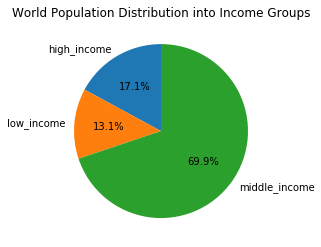

In [6]:
#building a pie chart to visualize the percentage of population in each income group
plt.pie(total_population_income_data['population_percentage'], 
        labels = total_population_income_data['income_group'], 
        startangle=90, 
        autopct='%.1f%%')
plt.title('World Population Distribution into Income Groups')
plt.savefig('solution_figures/prob1.png')

## Problem 2

In [7]:
#obtaining the GDP per capita data country wise, continent wise and overall
gdp_per_capita_data_file_path = '/Users/bishishta_mukherjee/Desktop/DS5500_HW1/data_files/ddf_datapoints_gdppercapita_us_inflation_adjusted_by_geo_time.csv'
gdp_per_capita_data_country, gdp_per_capita_data_continent, gdp_per_capita_data_world = read_csv(gdp_per_capita_data_file_path, 
                                                                                                 'gdppercapita_us_inflation_adjusted', 
                                                                                                 'gdp_per_capita')

#normalizing the values of GDP per capita
gdp_per_capita_data_country['gdp_per_capita'] = gdp_per_capita_data_country['gdp_per_capita'] / gdp_per_capita_data_country['gdp_per_capita'].max()

/usr/local/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:338: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


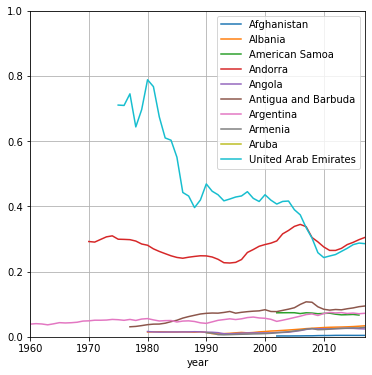

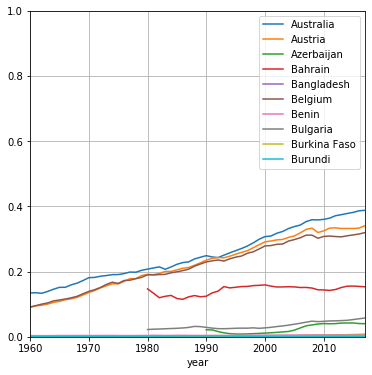

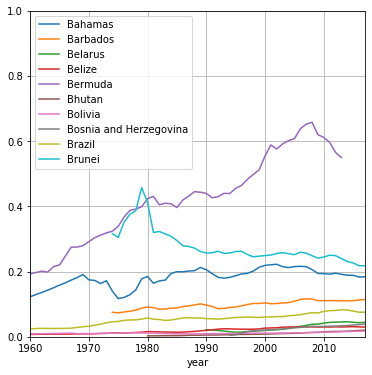

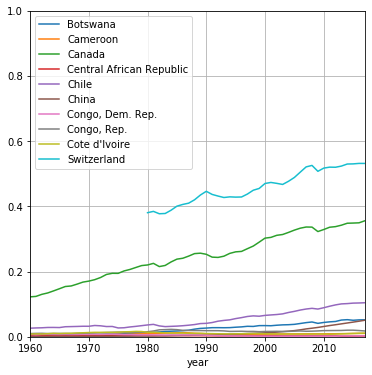

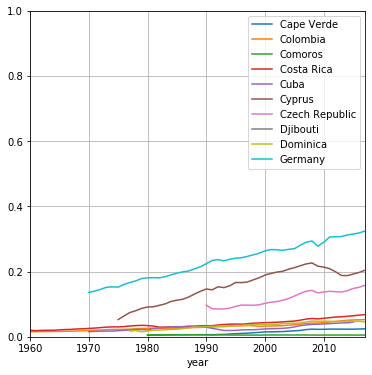

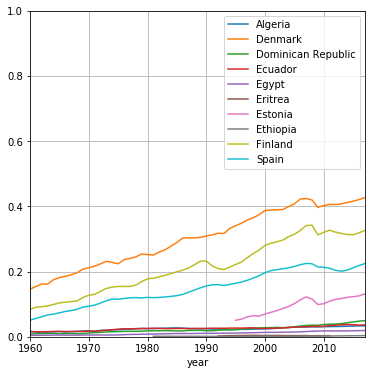

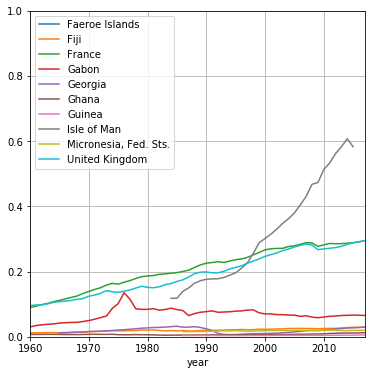

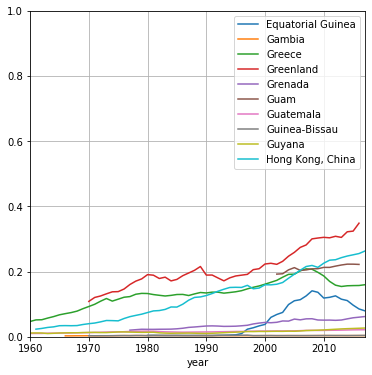

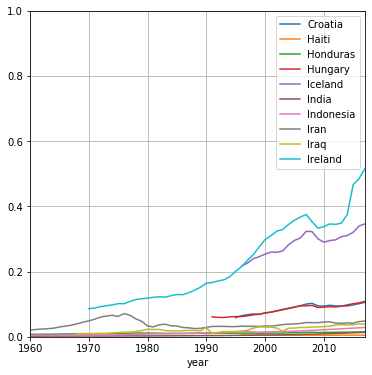

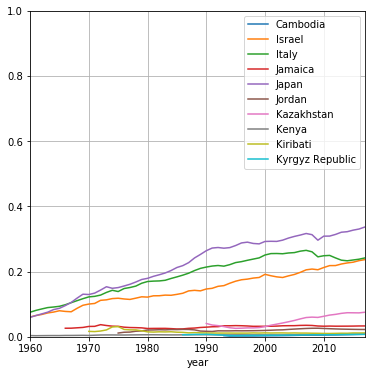

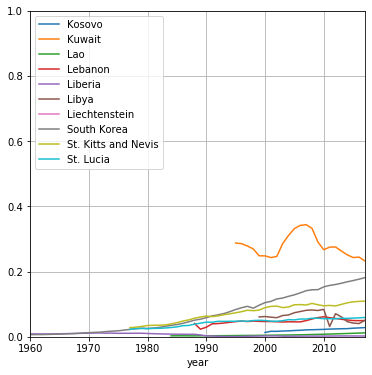

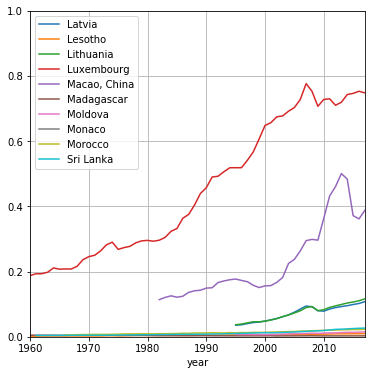

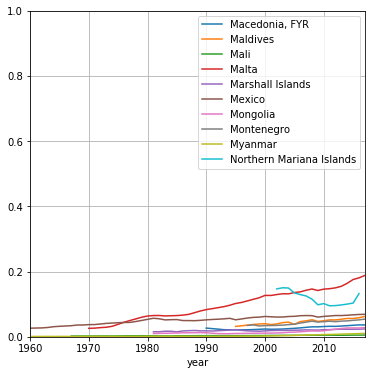

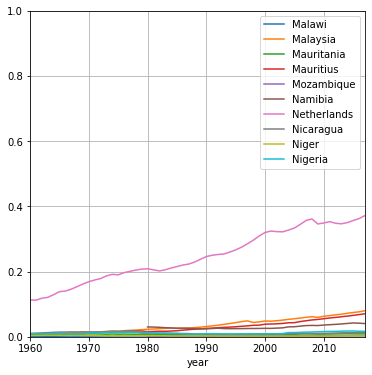

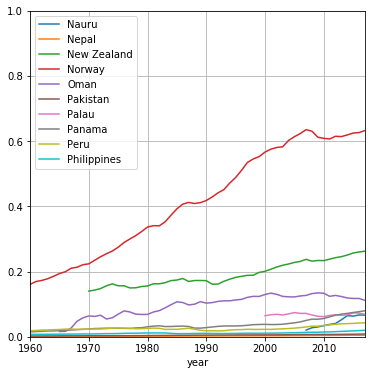

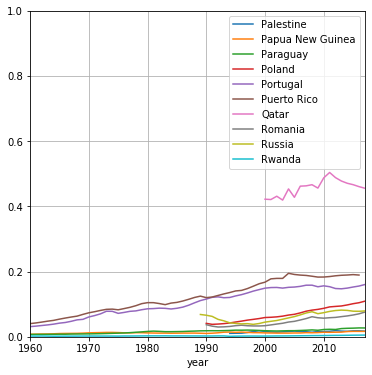

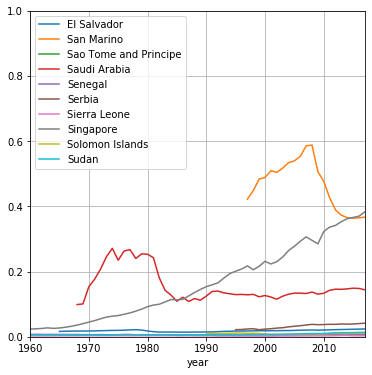

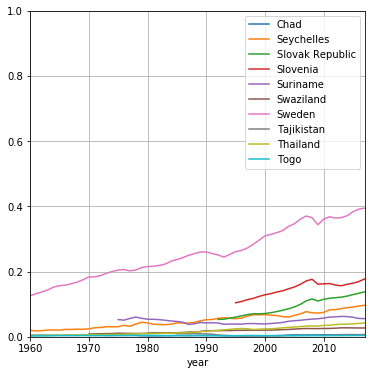

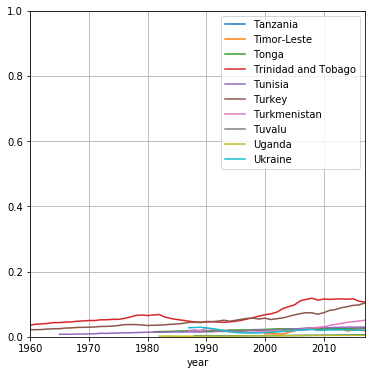

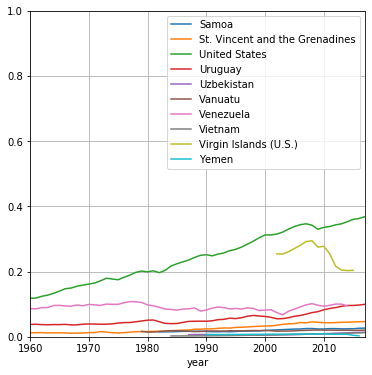

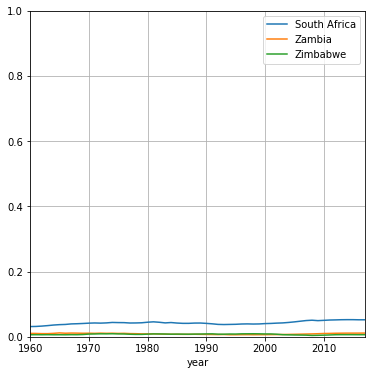

In [8]:
#plotting income distribution across various countries over time

countries = gdp_per_capita_data_country['country'].unique()
i = 0
while i < len(countries):
    country_list = countries[i:min(i + 10, len(countries))]
    temp_gdp_per_capita_data_country = gdp_per_capita_data_country.loc[gdp_per_capita_data_country.country.isin(country_list)]
    df = temp_gdp_per_capita_data_country.pivot(index = 'year', 
              columns = 'country', 
              values = 'gdp_per_capita')
    df.plot(figsize=(6,6), 
            grid = True)
    plt.ylim([0,1])
    plt.legend(loc='best')
    plt.savefig('solution_figures/prob2_countries_' + str(i) + '.png')
    i += 10

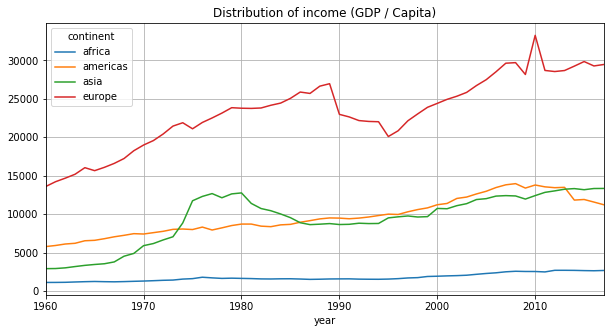

In [9]:
#plotting distribution of income across continents over time
df = gdp_per_capita_data_continent.pivot(index = 'year', 
              columns = 'continent', 
              values = 'gdp_per_capita')

ax = df.plot(figsize=(10,5), 
             title = 'Distribution of income (GDP / Capita)', 
             grid = True)
fig = ax.get_figure()
fig.savefig('solution_figures/prob2_continents.png')

## Problem 3

In [10]:
#obtaining the child mortality data country wise, continent wise and overall
child_mortality_data_file_path = '/Users/bishishta_mukherjee/Desktop/DS5500_HW1/data_files/ddf_datapoints_child_mortality_0_5_year_olds_dying_per_1000_born_by_geo_time.csv'
child_mortality_data_country, child_mortality_data_continent, child_mortality_data_world = read_csv(child_mortality_data_file_path, 
                                      'child_mortality_0_5_year_olds_dying_per_1000_born',
                                      'child_mortality_rate')

In [11]:
#obtaining the life expectancy data country wise, continent wise and overall
life_expectancy_data_file_path = '/Users/bishishta_mukherjee/Desktop/DS5500_HW1/data_files/ddf_datapoints_life_expectancy_years_by_geo_time.csv'
life_expectancy_data_country, life_expectancy_data_continent, life_expectancy_data_world = read_csv(life_expectancy_data_file_path,
                                                                                                   'life_expectancy_years',
                                                                                                   'life_expectancy')

In [12]:
#merging the overall data for gdp, child mortality and life expectancy
world_data = pd.merge(gdp_per_capita_data_world, life_expectancy_data_world, 
                      how = 'outer', 
                      on = 'year', 
                      validate = 'one_to_one').dropna(how = 'any', 
                                                      axis = 0)
world_data = pd.merge(world_data, 
                      child_mortality_data_world, 
                      how = 'outer', 
                      on = 'year', 
                      validate = 'one_to_one').dropna(how = 'any', 
                                                      axis = 0)

#normalizing the values in each of the three columns for gdp, child mortality and life expectancy 
world_data['gdp_per_capita'] = world_data['gdp_per_capita'] / world_data['gdp_per_capita'].max()
world_data['life_expectancy'] = world_data['life_expectancy'] / world_data['life_expectancy'].max()
world_data['child_mortality_rate'] = world_data['child_mortality_rate'] / world_data['child_mortality_rate'].max()

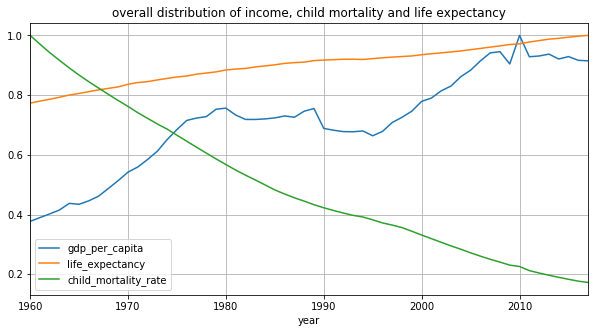

In [13]:
#comparing the overall distribution of gdp, child mortality and life expectancy over time
ax = world_data.plot(x = 'year', 
                     y=['gdp_per_capita', 
                        'life_expectancy', 
                        'child_mortality_rate'], 
                     title = 'overall distribution of income, child mortality and life expectancy', 
                     figsize=(10,5), 
                     grid=True)
fig = ax.get_figure()
fig.savefig('solution_figures/prob3_overall.png')

In [14]:
#merging the overall data for gdp, child mortality and life expectancy across continents
continent_data_combined = pd.merge(gdp_per_capita_data_continent, life_expectancy_data_continent, how = 'outer', on = ['year', 'continent'], validate = 'one_to_one').dropna(how = 'any', axis = 0)
continent_data_combined = pd.merge(continent_data_combined, child_mortality_data_continent, how = 'outer', on = ['year', 'continent'], validate = 'one_to_one').dropna(how = 'any', axis = 0)

#normalizing the values in each of the three columns for gdp, child mortality and life expectancy 
continent_data_combined['gdp_per_capita'] = continent_data_combined['gdp_per_capita'] / continent_data_combined['gdp_per_capita'].max()
continent_data_combined['life_expectancy'] = continent_data_combined['life_expectancy'] / continent_data_combined['life_expectancy'].max()
continent_data_combined['child_mortality_rate'] = continent_data_combined['child_mortality_rate'] / continent_data_combined['child_mortality_rate'].max()

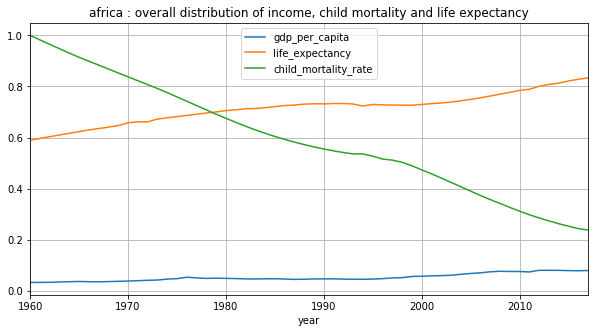

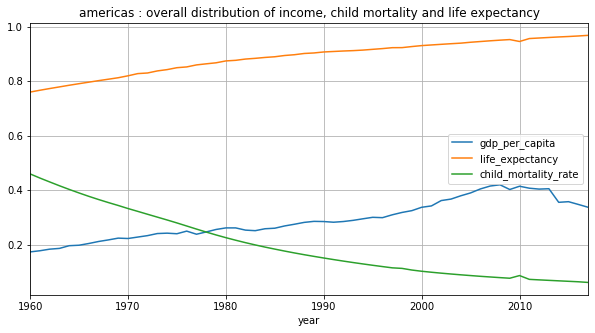

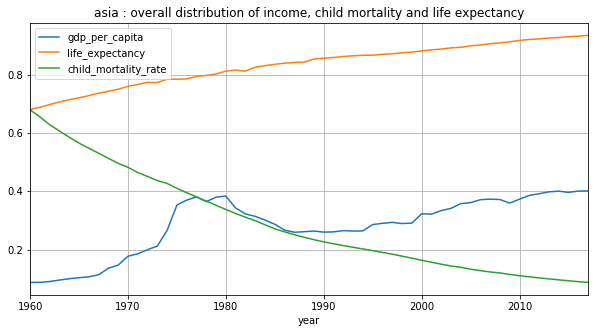

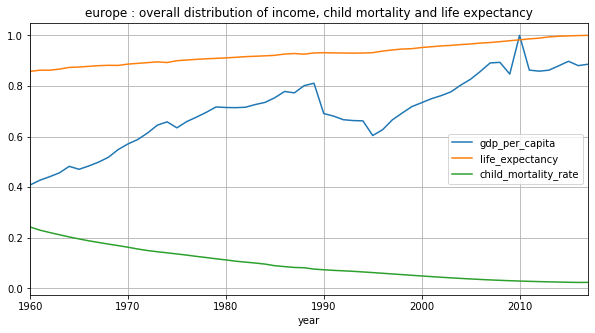

In [15]:
#comparing the overall distribution of gdp, child mortality and life expectancy over time within each continent
for continent in continent_data_combined['continent'].unique():
    ax = continent_data_combined.loc[continent_data_combined['continent'] == continent].plot(x = 'year', 
                                                                                             y=['gdp_per_capita', 
                                                                                                'life_expectancy', 
                                                                                                'child_mortality_rate'],
                                                                                             title = continent + ' : overall distribution of income, child mortality and life expectancy',
                                                                                             figsize=(10,5), 
                                                                                             grid=True)
    fig = ax.get_figure()
    fig.savefig('solution_figures/prob3_overall_' + continent + '.png')

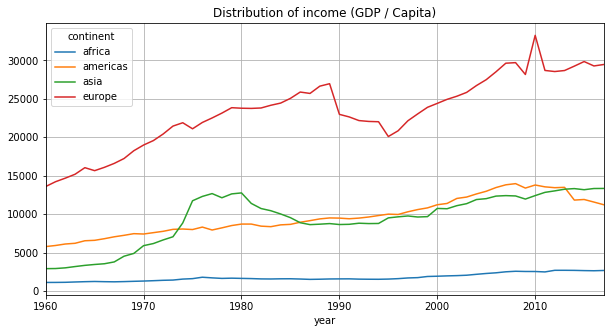

In [16]:
#comparing the overall distribution of gdp over time across continents
df = gdp_per_capita_data_continent.pivot(index = 'year', 
              columns = 'continent', 
              values = 'gdp_per_capita')
ax = df.plot(figsize=(10,5), 
             title = 'Distribution of income (GDP / Capita)', 
             grid = True)
fig = ax.get_figure()
fig.savefig('solution_figures/prob3_gdp_continents.png')

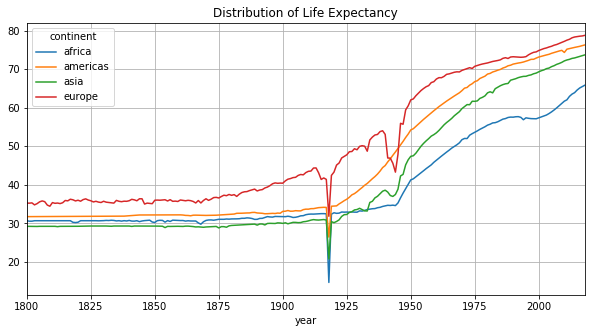

In [17]:
#comparing the overall distribution of life expectancy over time across continents
df = life_expectancy_data_continent.pivot(index = 'year', 
              columns = 'continent', 
              values = 'life_expectancy')
ax = df.plot(figsize=(10,5), 
             title = 'Distribution of Life Expectancy', 
             grid = True)
fig = ax.get_figure()
fig.savefig('solution_figures/prob3_life_expectancy_continents.png')

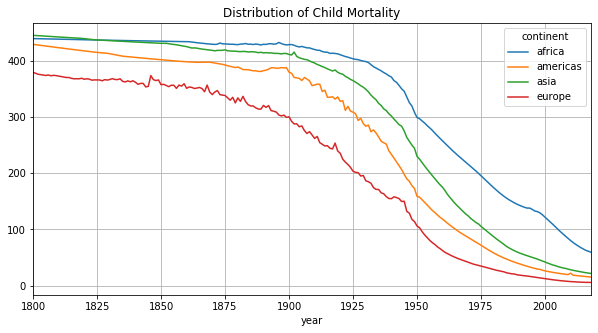

In [18]:
#comparing the overall distribution of child mortality over time across continents
df = child_mortality_data_continent.pivot(index = 'year', 
              columns = 'continent', 
              values = 'child_mortality_rate')
ax = df.plot(figsize=(10,5), 
             title = 'Distribution of Child Mortality', 
             grid = True)
fig = ax.get_figure()
fig.savefig('solution_figures/prob3_child_mortality_continents.png')

## Problem 4

In [19]:
#obtaining the basic sanitaion access data country wise, continent wise and overall
basic_sanitaion_access_data_file_path = '/Users/bishishta_mukherjee/Desktop/DS5500_HW1/data_files/ddf_datapoints_at_least_basic_sanitation_overall_access_percent_by_geo_time.csv'
basic_sanitaion_access_data_country, basic_sanitaion_access_data_continent, basic_sanitaion_access_data_world = read_csv(basic_sanitaion_access_data_file_path, 
                                                                                                                         'at_least_basic_sanitation_overall_access_percent',
                                                                                                                         'basic_sanitation_access_percent')

In [22]:
#obtaining the maternal death data continent wise and overall
maternal_death_data_file_path = '/Users/bishishta_mukherjee/Desktop/DS5500_HW1/data_files/ddf_datapoints_maternal_deaths_total_number_by_geo_time.csv'
maternal_death_data = pd.read_csv(maternal_death_data_file_path)
maternal_death_data = maternal_death_data.rename(columns = {'geo' : 'country_abv', 
                                                            'time' : 'year', 
                                                            'maternal_deaths_total_number' : 'maternal_deaths_number'})

maternal_death_data_continent = pd.merge(continent_info, 
                                    maternal_death_data, 
                                    how = 'outer', 
                                    on = 'country_abv', 
                                    validate = 'one_to_many').drop(['country_abv'], 
                                                                   axis = 1).dropna(how = 'any', 
                                                                                    axis = 0)
maternal_death_data_continent = maternal_death_data_continent.groupby(['continent', 
                                                                       'year'], 
                                                                      as_index = False)['maternal_deaths_number'].sum()
    
maternal_death_data_world = maternal_death_data_continent.groupby(['year'], 
                                                                  as_index = False)['maternal_deaths_number'].sum()

In [23]:
#merging the overall data for basic sanitaion access and maternal death
world_data = pd.merge(basic_sanitaion_access_data_world, maternal_death_data_world, 
                      how = 'outer', 
                      on = 'year', 
                      validate = 'one_to_one').dropna(how = 'any', 
                                                      axis = 0)

#normalizing the values in both the columns for basic sanitaion access and maternal death
world_data['basic_sanitation_access_percent'] = world_data['basic_sanitation_access_percent'] / world_data['basic_sanitation_access_percent'].max()
world_data['maternal_deaths_number'] = world_data['maternal_deaths_number'] / world_data['maternal_deaths_number'].max()

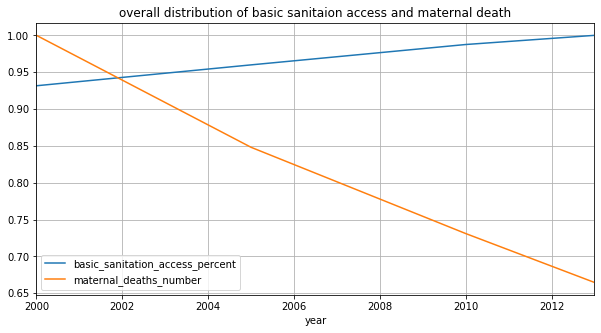

In [24]:
#comparing the overall distribution of basic sanitaion access and maternal death over time
ax = world_data.plot(x = 'year', 
                     y=['basic_sanitation_access_percent', 
                        'maternal_deaths_number'], 
                     title = 'overall distribution of basic sanitaion access and maternal death', 
                     figsize=(10,5), 
                     grid=True)

fig = ax.get_figure()
fig.savefig('solution_figures/prob4_overall.png')

In [25]:
#merging the overall data for basic sanitaion access and maternal death across continents
continent_data_combined = pd.merge(basic_sanitaion_access_data_continent, 
                                   maternal_death_data_continent, 
                                   how = 'outer', 
                                   on = ['year', 'continent'], 
                                   validate = 'one_to_one').dropna(how = 'any', 
                                                                   axis = 0)

#normalizing the values in both the columns for basic sanitaion access and maternal death
continent_data_combined['basic_sanitation_access_percent'] = continent_data_combined['basic_sanitation_access_percent'] / continent_data_combined['basic_sanitation_access_percent'].max()
continent_data_combined['maternal_deaths_number'] = continent_data_combined['maternal_deaths_number'] / continent_data_combined['maternal_deaths_number'].max()

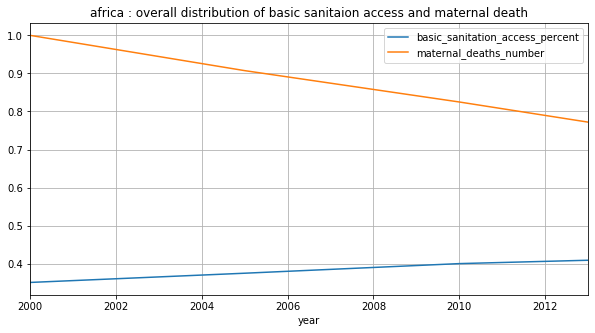

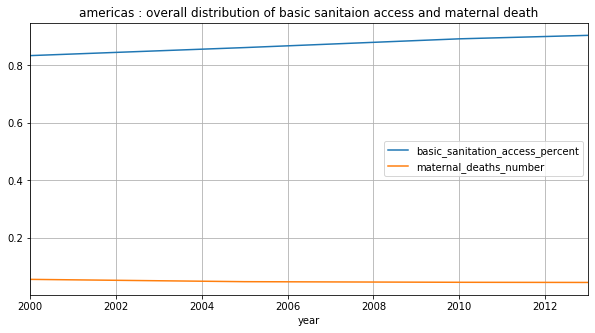

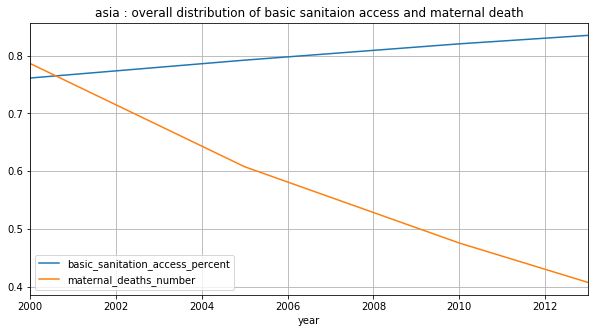

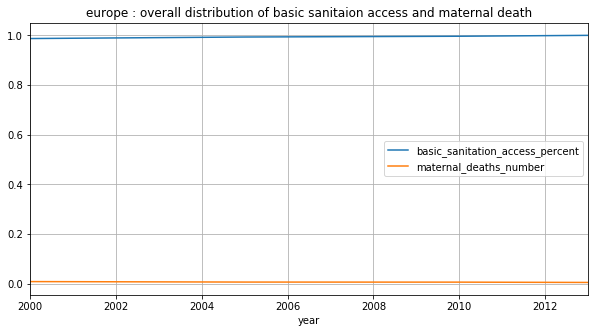

In [26]:
#comparing the overall distribution of basic sanitaion access and maternal death over time within each continent
for continent in continent_data_combined['continent'].unique():
    ax = continent_data_combined.loc[continent_data_combined['continent'] == continent].plot(x = 'year', 
                                                                                             y=['basic_sanitation_access_percent', 
                                                                                                'maternal_deaths_number'],
                                                                                             title = continent + ' : overall distribution of basic sanitaion access and maternal death',
                                                                                             figsize=(10,5), 
                                                                                             grid=True)
    fig = ax.get_figure()
    fig.savefig('solution_figures/prob4_overall_' + continent + '.png')